In [41]:
import pickle
import json

with open("data\classroom\json_lst1_0822.pkl", "rb") as f:
    data1 = pickle.load(f)
with open("data\classroom\json_lst2_0822.pkl", "rb") as f:
    data2 = pickle.load(f)
with open("data\classroom\json_lst3_0822.pkl", "rb") as f:
    data3 = pickle.load(f)
with open("data\classroom\json_lst4_0822.pkl", "rb") as f:
    data4 = pickle.load(f)
data = data1 + data2 + data3 + data4

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
C:\Users\cwei\AppData\Local\Temp\ipykernel_16080\2744135099.py:4: SyntaxWarning: invalid escape sequence '\c'
  with open("data\classroom\json_lst1_0822.pkl", "rb") as f:
C:\Users\cwei\AppData\Local\Temp\ipykernel_16080\2744135099.py:6: SyntaxWarning: invalid escape sequence '\c'
  with open("data\classroom\json_lst2_0822.pkl", "rb") as f:
C:\Users\cwei\AppData\Local\Temp\ipykernel_16080\2744135099.py:8: SyntaxWarning: invalid escape sequence '\c'
  with open("data\classroom\json_lst3_0822.pkl", "rb") as f:
C:\Users\cwei\AppData\Local\Temp\ipykernel_16080\2744135099.py:10: SyntaxWarning: inv

In [42]:
with open("data\classroom_data_raw_0822.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=2, ensure_ascii=False)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\cwei\AppData\Local\Temp\ipykernel_16080\1677220256.py:1: SyntaxWarning: invalid escape sequence '\c'
  with open("data\classroom_data_raw_0822.json", "w", encoding="utf-8") as f:


In [57]:
import json

with open("data/classroom_data_raw_0822.json", "r") as f:
    data = json.load(f)

### Scene Graph Data Visualization

In [2]:
import os
# your env paths:
CONDA = r"C:\Users\cwei\AppData\Local\anaconda3\envs\sgn_env"

dll_dirs = [
    rf"{CONDA}\Library\bin",
    rf"{CONDA}\Library\bin\graphviz",  # plugin dir
]
if hasattr(os, "add_dll_directory"):  # Python 3.8+
    for d in dll_dirs:
        if os.path.isdir(d):
            os.add_dll_directory(d)

# also help subprocesses (e.g., dot called by pydot)
os.environ["PATH"] = os.pathsep.join(d for d in dll_dirs if os.path.isdir(d)) + os.pathsep + os.environ["PATH"]
os.environ["GV_PLUGIN_PATH"] = rf"{CONDA}\Library\bin\graphviz"


In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

EDGE_STYLE = {
    "floor-wall":       dict(color="black",   penwidth="1.8", style="solid"),
    "wall-wall":        dict(color="blue",  penwidth="1.8", style="dashed"),
    "supporting":       dict(color="orange", penwidth="2.2", style="solid"),
    "supported by":     dict(color="#b58436",penwidth="1.8", style="solid"),
    "surrounding":      dict(color="red",    penwidth="2.2", style="solid"),
    "surrounded by":    dict(color="#EC9C9C",penwidth="1.8", style="solid"),
    "next-to":          dict(color="green",penwidth="1.6", style="dashed"),
    "co-occurring":     dict(color="#9213D6",penwidth="1.6", style="solid"),
    "_default":         dict(color="#777777",penwidth="1.6", style="solid"),
}

NODE_STYLE = {
    "floor":  dict(shape="box",   style="rounded,filled", fillcolor="#f7f7f7"),
    "wall":   dict(shape="ellipse"),
    "door":   dict(shape="ellipse"),
    "window":   dict(shape="ellipse"),
    "table":  dict(shape="ellipse"),
    "seating":dict(shape="ellipse"),
    "casework":dict(shape="ellipse"),
    'Board': dict(shape="ellipse"),
    'Desk': dict(shape="ellipse"),
    'Podium': dict(shape="ellipse"),
    'Screen': dict(shape="ellipse"),
    'Softscape': dict(shape="ellipse"),
    'Storage': dict(shape="ellipse"),
    'TablesAndChairs': dict(shape="ellipse"),
    'Workstation': dict(shape="ellipse")
}

def draw_tree(nodes, edges, outfile, rankdir="TB", show_rel_labels=False):
    """
    nodes: [{'id': ..., 'type': 'Wall'|'Table'|..., (optional) 'label': '42'}]
    edges: [{'source': id1, 'target': id2, 'relationship': 'Surrounding'|...}, ...]
    """
    # 1) allow parallel edges
    G = nx.MultiDiGraph()

    # 2) nodes with type + label (ID+Type on two lines)
    for n in nodes:
        nid = n["id"]
        ntype = str(n.get("type","")).lower()
        base = n.get("label", str(nid))
        G.add_node(nid, ntype=ntype, label=f"{base}\\n{ntype.title() if ntype else 'Unknown'}")

    # 3) add one edge per relationship (same u,v allowed with different key)
    for e in edges:
        u, v = e["source"], e["target"]
        rel = e.get("relationship", "")
        style = EDGE_STYLE.get(rel, EDGE_STYLE["_default"]).copy()
        style["rel"] = rel
        if show_rel_labels and rel:
            style["label"] = rel  # edge text label (optional)
        # helpful for parallel edges: curved splines and a bit of separation
        style.setdefault("minlen", "1")
        G.add_edge(u, v, key=rel, **style)

    # 4) to Graphviz
    A = to_agraph(G)
    A.graph_attr.update(rankdir=rankdir, splines="spline", overlap="false",
                        bgcolor="white", ranksep="0.6", nodesep="0.35")
    A.node_attr.update(shape="ellipse", fontname="Arial", fontsize="10")
    A.edge_attr.update(arrowsize="0.6", fontname="Arial", fontsize="9")

    # node styles by type
    for n in G.nodes():
        t = G.nodes[n].get("ntype","")
        for k, v in NODE_STYLE.get(t, {}).items():
            A.get_node(n).attr[k] = v
        # label already set above

    # edge attributes already carried in via add_edge; no extra loop needed

    A.layout("dot")   # hierarchical
    A.draw(outfile)
    # print(f"Saved {outfile}")

In [ ]:
for i, room in enumerate(data):
    nodes = room['nodes']
    edges = room['edges']
    draw_tree(nodes, edges, outfile=f"data/data_visualization/sceneTree/room{i}.pdf", rankdir="TB")


In [12]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
from matplotlib import colors as mcolors
import matplotlib.patheffects as pe
from pathlib import Path

def plot_2d_layout(nodes, room_number, figsize=(20, 16), circle_radius=None, show_legend=True):
    """
    nodes: list of dicts. Each dict must include:
      - 'id': hashable
      - 'type': e.g., 'Wall', 'Chair', ...
      For non-walls:
        - 'center point x', 'center point y'
      For walls:
        - 'start point x', 'start point y', 'end point x', 'end point y'
    """
    # --- Colors per type (edit as you like) ---
    base_type_colors = {
        "wall":    "black",
        "table":   "#ff7f0e",
        "chair":   "#1f77b4",
        "seating": "#2ca02c",
        "casework":"#8c564b",
        "floor":   "#7f7f7f",
        "door":    "#e377c2",
        "window":  "#17becf",
        'Board':  "#9e9e9e",
        'Desk': "#d62728",
        'Podium':   "#9467bd",
        'Screen': "#bcbd22",
        'Softscape':    "#8c564b",
        'Storage':  "#e377c2",
        'TablesAndChairs':  "#1f77b4",
        'Workstation':  "#ff7f0e",
    }

    # fallback palette for unknown types
    palette = plt.get_cmap("tab20")

    def color_for_type(t, idx):
        t_low = (t or "").lower()
        return base_type_colors.get(t_low, palette(idx % 20))

    # --- Collect coordinates for limits ---
    xs, ys = [], []
    for n in nodes:
        t = (n.get("type") or "").lower()
        if t == "wall":
            sx, sy = n.get("start point x"), n.get("start point y")
            ex, ey = n.get("end point x"),   n.get("end point y")
            if None not in (sx, sy, ex, ey):
                xs += [float(sx), float(ex)]
                ys += [float(sy), float(ey)]
        else:
            cx, cy = n.get("center point x"), n.get("center point y")
            if None not in (cx, cy):
                xs.append(float(cx)); ys.append(float(cy))

    if not xs or not ys:
        raise ValueError("No plottable coordinates found in nodes.")

    xmin, xmax = min(xs), max(xs)
    ymin, ymax = min(ys), max(ys)
    dx = xmax - xmin or 1.0
    dy = ymax - ymin or 1.0
    pad = 0.05 * max(dx, dy)

    # Default circle radius ~1% of the larger span (in data units)
    if circle_radius is None:
        circle_radius = 0.01 * max(dx, dy)

    # --- Draw ---
    fig, ax = plt.subplots(figsize=figsize)

    # 1) Walls as black line segments (single legend entry)
    wall_drawn = False
    for n in nodes:
        if (n.get("type") or "").lower() != "wall":
            continue
        sx, sy = n.get("start point x"), n.get("start point y")
        ex, ey = n.get("end point x"),   n.get("end point y")
        if None in (sx, sy, ex, ey):
            continue
        sx, sy, ex, ey = map(float, (sx, sy, ex, ey))
        lbl = "Wall" if not wall_drawn else None
        ax.plot([sx, ex], [sy, ey], color=base_type_colors["wall"], lw=2.5, label=lbl)
        wall_drawn = True

        mx, my = (sx + ex) * 0.5, (sy + ey) * 0.5
        angle_deg = math.degrees(math.atan2(ey - sy, ex - sx))
        nid = n.get("id", "")
        text = f"{nid}\nWall"
        ax.text(
            mx, my, text,
            ha="center", va="center",
            rotation=angle_deg, rotation_mode="anchor",
            fontsize=8, color="black",
            path_effects=[pe.withStroke(linewidth=3, foreground="white")]  # readable on line
        )
    # 2) Other objects as circles with (ID\nType)
    #    Keep deterministic color assignment per type
    type_to_index = {}
    type_counter = 0
    legend_handles = {}

    for n in nodes:
        t = (n.get("type") or "")
        if t.lower() == "wall":
            continue
        cx, cy = n.get("center point x"), n.get("center point y")
        if None in (cx, cy):
            continue

        if t not in type_to_index:
            type_to_index[t] = type_counter
            type_counter += 1
        fc = color_for_type(t, type_to_index[t])

        circ = Circle((float(cx), float(cy)), radius=circle_radius,
                      facecolor=fc, edgecolor="black", linewidth=0.8)
        ax.add_patch(circ)

        # Label inside the circle: ID on first line, Type on second
        nid = n.get("id", "")
        label = f"{nid}\n{t}" if t else str(nid)
        ax.text(float(cx), float(cy), label, ha="center", va="center",
                fontsize=8, color='black')

        # Prepare legend handle per type (once)
        if t not in legend_handles:
            legend_handles[t] = Line2D([0],[0], marker="o", color="w",
                                       markerfacecolor=fc, markeredgecolor="black",
                                       markersize=9, label=t or "Unknown")

    # Axes & limits
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(xmin - pad, xmax + pad)
    ax.set_ylim(ymin - pad, ymax + pad)
    ax.set_xlabel("X"); ax.set_ylabel("Y")
    ax.set_title("2D Room layout")

    # Legend on the right
    if show_legend:
        handles = []
        if wall_drawn:
            handles.append(Line2D([0],[0], color="black", lw=2.5, label="Wall"))
        handles += [legend_handles[k] for k in sorted(legend_handles)]
        ax.legend(handles=handles, title="Types", loc="center left", bbox_to_anchor=(1.02, 0.5))

    ax.grid(True, alpha=0.3, linewidth=0.5)
    plt.tight_layout()
    outdir = Path("data/data_visualization/room_plot")
    outdir.mkdir(parents=True, exist_ok=True)
    fig.savefig(outdir / f"room{room_number}.png", dpi=300, bbox_inches="tight") 
    plt.show()


In [ ]:
for i, room in enumerate(data):
    nodes = room['nodes']
    edges = room['edges']
    plot_2d_layout(room['nodes'], i, circle_radius=0.7)  

### Create Classroom Data for Training

In [60]:
def convert_with_relationships(data):
    nodes = data['nodes']
    edges = data.get('edges', [])

    type_counters = {}
    id_to_name = {}
    name_to_type = {}

    result = {'node_list': {}}

    # Step 1: Build node structure with type and center point
    for node in nodes:
        node_type = node['type']
        node_id = node['id']
        x = node['center point x']
        y = node['center point y']
        if node.get("movability") == "Moveable":
            is_movable = True
        else:
            is_movable = False

        # Handle naming
        if node_type.lower() == "floor":
            name = "Floor"
        else:
            count = type_counters.get(node_type, 0)
            name = f"{node_type.lower()}_{count}"
            type_counters[node_type] = count + 1

        # Track name → id and type
        id_to_name[node_id] = name
        name_to_type[name] = node_type

        # Add node to result
        result['node_list'][name] = {
            "type": node_type,
            "self_info": {
                "center point": [x, y],
                "is_movable": is_movable
            }
        }

    # Step 2: Add floor-wall relationships
    seen_edges = set()
    filtered_edges = []
    for edge in edges:
        edge_key = (edge['source'], edge['target'], edge['relationship'])
        if edge_key not in seen_edges:
            seen_edges.add(edge_key)
            filtered_edges.append(edge)

    # Step 3: Add floor-wall and other relationships
    edge_src_set = set()
    edge_tgt_set = set()
    for edge in filtered_edges:    
        src_id = edge['source']
        tgt_id = edge['target']
        edge_src_set.add(src_id)
        edge_tgt_set.add(tgt_id)
        rel = edge['relationship']

        src_name = id_to_name[src_id]
        tgt_name = id_to_name[tgt_id]

        # Floor → Wall
        if name_to_type[src_name] == "Floor" or name_to_type[tgt_name] == "Floor":
            result['node_list'][src_name].setdefault("floor_wall", []).append(tgt_name)
            # result['node_list'][tgt_name].setdefault("floor_wall", []).append(src_name)
        else:
            result['node_list'][src_name].setdefault("floor_wall", [])

        # Wall → Wall
        if name_to_type[src_name] == "Wall" and name_to_type[tgt_name] == "Wall":
            result['node_list'][src_name].setdefault("wall_wall", []).append(tgt_name)
        else:
            result['node_list'][src_name].setdefault("wall_wall", [])

        # wall supporting door/window/other object or furniture supporting furniture
        if rel == "supporting":
            result['node_list'][src_name].setdefault("supporting", []).append(tgt_name)
        else:
            result['node_list'][src_name].setdefault("supporting", [])

        # other object/door/window supported by wall or furniture supported by furniture
        if rel == "supported by":
            result['node_list'][src_name].setdefault("supported by", []).append(tgt_name)
        else:
            result['node_list'][src_name].setdefault("supported by", [])

        surrounding_pair_set = set()
        # seating surrounding table
        if rel == "surrounding":
            result['node_list'][src_name].setdefault("surrounding", []).append(tgt_name)
        else:
            result['node_list'][src_name].setdefault("surrounding", [])

        # table surrounded by seating
        if rel == "surrounded by":
            result['node_list'][src_name].setdefault("surrounded by", []).append(tgt_name)
        else:
            result['node_list'][src_name].setdefault("surrounded by", [])

        # object next to object
        if rel == "next-to":
            result['node_list'][src_name].setdefault("object_neighbor", []).append(tgt_name)
        else:
            result['node_list'][src_name].setdefault("object_neighbor", [])

        # object co-occur object
        if rel == "co-occurring":
            result['node_list'][src_name].setdefault("object_cooc", []).append(tgt_name)
        else:
            result['node_list'][src_name].setdefault("object_cooc", [])

    return result


In [70]:
def floor_to_leaf_paths(nodes):
    """
    nodes: dict mapping node_id -> {
        'type': str,
        ...,
        '<edge_kind>': [list of neighbor node_ids],  # for each of floor_wall, wall_wall, object_support, object_neighbor, object_cooc
    }
    Returns: list of lists, each a root-to-node path satisfying the rule.
    """
    # 1) Build undirected adjacency
    edge_kinds = ['floor_wall','supporting','supported by','surrounding','surrounded by','object_cooc']
    adj = {n: set() for n in nodes}
    for n, info in nodes.items():
        for kind in edge_kinds:
            for m in info.get(kind, []):
                adj[n].add(m)
                adj[m].add(n)
    
    paths = []
    visited = set()

    def dfs(path):
        current = path[-1]
        # If this is not the root and it's NOT a direct Floor→Wall step, record it
        if len(path) > 1:
            # detect direct Floor→Wall
            if not (path[0] == 'Floor' and len(path) == 2 and nodes[current]['type'] == 'Wall'):
                paths.append(path.copy())
        # Now recurse unless we hit a “stop-here” case:
        #   Floor→Wall must not recurse
        wall_count = sum(1 for u in path if nodes[u]['type'] == 'Wall')
        # Otherwise, continue to unvisited neighbors
        for nbr in adj[current]:
            if nbr in path:
                continue
            if nodes[nbr]['type'] == 'Wall' and wall_count >= 1:
                continue
            path.append(nbr)
            dfs(path)
            path.pop()
    
    # Kick off from Floor
    if 'Floor' not in nodes:
        raise KeyError("No 'Floor' node in dictionary")
    dfs(['Floor'])
    return paths


In [75]:
lst = []
for i, room in enumerate(data):  
    mod_room = convert_with_relationships(room)
    path = floor_to_leaf_paths(mod_room['node_list'])
    if 1 < len(path) < 150:
        lst.append(mod_room)


In [67]:
# Save to JSON
with open("data/classroom_data.json", "w") as f:
    json.dump(lst, f, indent=2)

In [20]:
import json

with open("data/classroom_data.json", "r") as f:
    data = json.load(f)

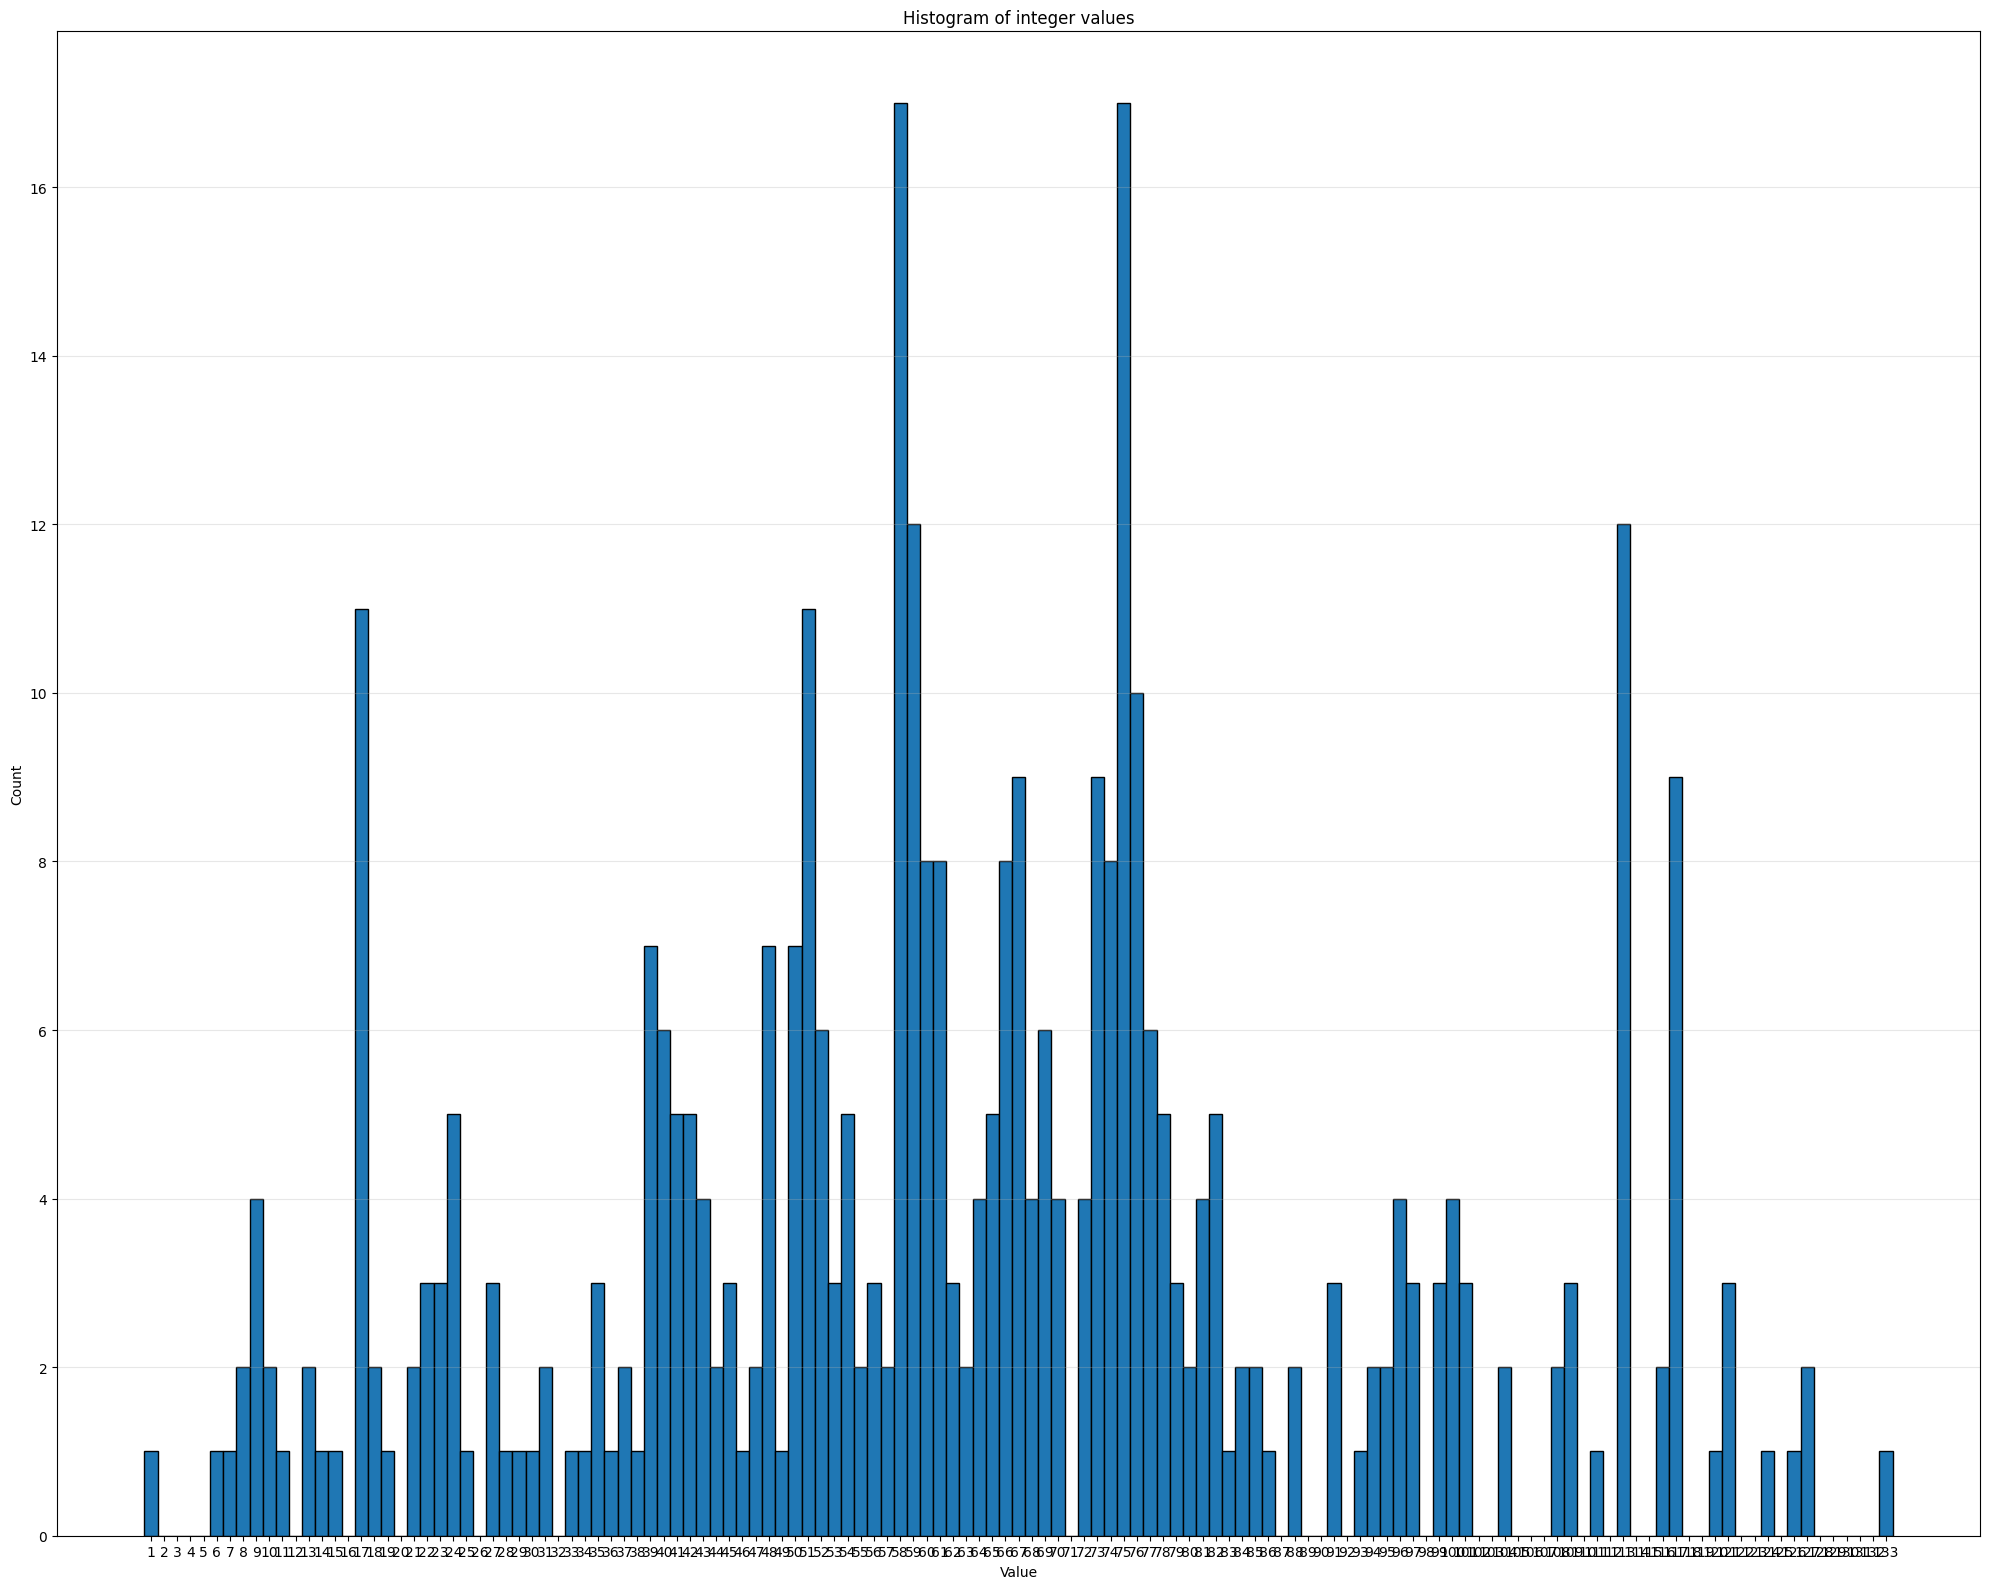

In [76]:
import numpy as np
# 1) integer-aligned bins
vmin, vmax = int(min(len_lst)), int(max(len_lst))
bins = np.arange(vmin - 0.5, vmax + 1.5, 1)   # centers at integers

plt.figure(figsize=(20,16))
plt.hist(len_lst, bins=bins, edgecolor="black")  # no custom colors needed
plt.xticks(range(vmin, vmax + 1))
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram of integer values")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [43]:
# (index, value) pairs sorted by value (low → high)
pairs = sorted(enumerate(len_lst), key=lambda x: x[1])

indices_in_order = [i for i, v in pairs]   # → [1, 3, 5, 0, 2, 4]
sorted_vals      = [v for i, v in pairs]   # → [3, 3, 4, 7, 9, 11]


In [44]:
indices_in_order

[124,
 317,
 77,
 283,
 307,
 122,
 282,
 286,
 306,
 79,
 313,
 320,
 1,
 308,
 247,
 78,
 107,
 268,
 269,
 272,
 276,
 279,
 295,
 296,
 298,
 302,
 305,
 4,
 123,
 0,
 184,
 197,
 198,
 230,
 251,
 8,
 80,
 85,
 81,
 82,
 83,
 84,
 312,
 86,
 6,
 7,
 315,
 246,
 87,
 5,
 121,
 235,
 236,
 25,
 3,
 228,
 310,
 309,
 95,
 237,
 231,
 70,
 249,
 250,
 252,
 311,
 358,
 375,
 58,
 60,
 64,
 183,
 211,
 359,
 59,
 138,
 179,
 181,
 182,
 196,
 281,
 285,
 360,
 377,
 102,
 178,
 180,
 229,
 18,
 316,
 23,
 24,
 116,
 119,
 245,
 248,
 12,
 45,
 74,
 88,
 176,
 193,
 373,
 68,
 13,
 14,
 19,
 20,
 62,
 66,
 314,
 16,
 17,
 38,
 39,
 56,
 195,
 224,
 238,
 318,
 319,
 376,
 10,
 220,
 223,
 227,
 234,
 243,
 177,
 221,
 222,
 2,
 191,
 207,
 329,
 371,
 51,
 226,
 15,
 136,
 209,
 192,
 239,
 21,
 22,
 27,
 29,
 31,
 33,
 34,
 36,
 63,
 67,
 71,
 73,
 76,
 106,
 208,
 233,
 372,
 11,
 30,
 32,
 42,
 46,
 49,
 50,
 53,
 72,
 75,
 199,
 232,
 9,
 41,
 44,
 47,
 48,
 118,
 120,
 156,
 61,
 6

In [45]:
sorted_vals

[1,
 6,
 7,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 11,
 13,
 13,
 14,
 15,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 19,
 21,
 21,
 22,
 22,
 22,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 25,
 27,
 27,
 27,
 28,
 29,
 30,
 31,
 31,
 33,
 34,
 35,
 35,
 35,
 36,
 37,
 37,
 38,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,
 42,
 42,
 42,
 42,
 42,
 43,
 43,
 43,
 43,
 44,
 44,
 45,
 45,
 45,
 46,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 52,
 52,
 52,
 53,
 53,
 53,
 54,
 54,
 54,
 54,
 54,
 55,
 55,
 56,
 56,
 56,
 57,
 57,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 62,
 62,
 62,
 63,
 63,
 64,
 64,
 64,
 64,
 65,
 65,
 65,
 65,
 65,